<p align = "center">
<img src="https://academy.sdaia.gov.sa/assets/images/academy-logo.png" align = "center" width="400">
</p>

<p align = "center">
<img src="https://upload.wikimedia.org/wikipedia/ar/9/96/%D8%B4%D8%B9%D8%A7%D8%B1_%D8%A3%D9%83%D8%A7%D8%AF%D9%8A%D9%85%D9%8A%D8%A9_%D8%B7%D9%88%D9%8A%D9%82.png" align = "center" width="400">
</p>
<div> </div>


# Project: Sales Analysis for AAL Clothing

### Project Statement

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.

The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:

1. Determine the states that are generating the highest revenues, and
2. Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same

Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year. Enclosed is the CSV (`AusApparalSales4thQrt2020.csv`) file that covers the said data.

## Tasks

As a data scientist, you must perform the following main steps on the enclosed data.
1.	Data Wrangling
2.	Data Analysis
3.	Data Visualization and
4.	Report Generation

### 1. Data Wrangling

1. Data cleaning (ensure that there is no missing or incorrect data):
    1. Duplicated rows
    2. Invalid entries
    3. Rename Cols & formatting
    4. Data Type check
1. Categorical data cleaning:
    1. Check format different level to be all in same lower or upper case
    2. Encoding
    2. Missing
1. Numeric data cleaning:
    1. Missing
    2. Check Logical values
    3. Normalization

### 2. Data Analysis

1. Perform descriptive statistical analysis on the sales data, including mean, median, mode, range, quartilers, and standard deviation.
1. Identify the groups and states that are generating the highest and lowest sales.
1. Generate weekly, monthly, and quarterly reports for the analysis made.

### 3. Data Visualization

Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes:

1. **State-wise sales** analysis for different groups (kids, women, men, and seniors)
1. **Group-wise sales** analysis (kids, women, men, and seniors) across different states
1. **Time-of-the-day** analysis: during which time of the day are sales the highest, and during which time are sales the lowest?  

The dashboard must contain daily, weekly, monthly and quarterly charts.

Note: **Seaborn** provides a variety of pre-built charts and plots, which can save time and effort.

### 4. Report Generation

* This Notebook shall be your "report".
* Use markdown wisely to make it presentable.
* The report should contain suitable graphs, plots and analysis reports.

# Importing the dataset :

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv ('AusApparalSales4thQrt2020.csv')
print(df)

             Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


## 1. Data Wrangling
### 1-Data cleaning
#### 1-Duplicated rows

In [2]:
df = df.drop_duplicates()

#### 2-Invalid entries

In [3]:
print(df.isnull().sum())
df = df.dropna()  # drop rows with any missing values


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


#### 3. Rename Cols & formatting

In [4]:

column_names= {'Date': 'OrderDate', 'Time': 'OrderTime', 'State': 'Region','Group':'CustomerGroup','Unit':'Quantity','Sales':'SalesAmount'}

for current_name, new in column_names.items():
    df = df.rename(columns={current_name: new})
print ('New column names :')
df.head(0)

New column names :


,OrderDate,OrderTime,Region,CustomerGroup,Quantity,SalesAmount


#### 4. Data Type check

In [5]:
df['OrderDate'] = pd.to_datetime(df['OrderDate']).dt.date
df['OrderTime'] = df['OrderTime'].astype(str)
df['Region'] = df['Region'].astype(str)
df['CustomerGroup'] = df['CustomerGroup'].astype(str)


### 1. Categorical data cleaning:
#### 1. Check format different level to be all in same lower or upper case

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df['Region'] = df['Region'].str.lower()
df['CustomerGroup'] = df['CustomerGroup'].str.lower()
df['OrderTime'] = df['OrderTime'].str.lower()
df.head()

,OrderDate,OrderTime,Region,CustomerGroup,Quantity,SalesAmount
0,2020-10-01,morning,wa,kids,8,20000
1,2020-10-01,morning,wa,men,8,20000
2,2020-10-01,morning,wa,women,4,10000
3,2020-10-01,morning,wa,seniors,15,37500
4,2020-10-01,afternoon,wa,kids,3,7500


#### 2. Encoding
No need !
This Data is not going to be feed into an AI model ,if its going to be feed to an AI model ,then we will need to encode it .
#### 2. Missing
Alrady checked for this is step 2(Invalid entries)
### 1. Numeric data cleaning:
#### 1. Missing
Alrady checked for this is step 2(Invalid entries)
#### 2. Check Logical values


In [7]:
df[(df['SalesAmount'] < 0)]

,OrderDate,OrderTime,Region,CustomerGroup,Quantity,SalesAmount


In [8]:
df[df['Quantity']<0]

,OrderDate,OrderTime,Region,CustomerGroup,Quantity,SalesAmount


#### 3. Normalization

In [9]:
minQ=df['Quantity'].min()
maxQ=df['Quantity'].max()
df['normalized_Quantity'] = (df['Quantity'] - minQ) / (maxQ - minQ)
minS=df['SalesAmount'].min()
maxS=df['SalesAmount'].max()
df['normalized_SalesAmount'] = (df['SalesAmount'] - minS) / (maxS - minS)

In [10]:
df.head()

,OrderDate,OrderTime,Region,CustomerGroup,Quantity,SalesAmount,normalized_Quantity,normalized_SalesAmount
0,2020-10-01,morning,wa,kids,8,20000,0.095238,0.095238
1,2020-10-01,morning,wa,men,8,20000,0.095238,0.095238
2,2020-10-01,morning,wa,women,4,10000,0.031746,0.031746
3,2020-10-01,morning,wa,seniors,15,37500,0.206349,0.206349
4,2020-10-01,afternoon,wa,kids,3,7500,0.015873,0.015873


### 2. Data Analysis
#### 1-descriptive statistical analysis

In [11]:
from scipy import stats
print('SalesAmount mean = ',df['SalesAmount'].mean())
print ('SalesAmount median =', df['SalesAmount'].median())
print ('SalesAmount mood = ',stats.mode(df['SalesAmount'])[0])
print('SalesAmount range = ', maxS - minS)
print ('SalesAmount quantile 1 = ',df['SalesAmount'].quantile(0.25))
print ('SalesAmount quantile 2 = ',df['SalesAmount'].median())
print ('SalesAmount quantile 3 = ',df['SalesAmount'].quantile(0.75))
print ('SalesAmount STD = ',df['SalesAmount'].std())

SalesAmount mean =  45013.5582010582
SalesAmount median = 35000.0
SalesAmount mood =  [22500]
SalesAmount range =  157500
SalesAmount quantile 1 =  20000.0
SalesAmount quantile 2 =  35000.0
SalesAmount quantile 3 =  65000.0
SalesAmount STD =  32253.506943966317


C:\Users\abubakr\AppData\Local\Temp\ipykernel_28680\10430169.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print ('SalesAmount mood = ',stats.mode(df['SalesAmount'])[0])


In [12]:
print('Quantity mean = ',df['Quantity'].mean())
print ('Quantity median =', df['Quantity'].median())
print ('Quantity mood = ',stats.mode(df['Quantity'])[0])
print('Quantity range = ', maxQ - minQ)
print ('Quantity quantile 1 = ',df['Quantity'].quantile(0.25))
print ('Quantity quantile 2 = ',df['Quantity'].median())
print ('Quantity quantile 3 = ',df['Quantity'].quantile(0.75))
print ('Quantity STD = ',df['Quantity'].std())

Quantity mean =  18.00542328042328
Quantity median = 14.0
Quantity mood =  [9]
Quantity range =  63
Quantity quantile 1 =  8.0
Quantity quantile 2 =  14.0
Quantity quantile 3 =  26.0
Quantity STD =  12.901402777586458


C:\Users\abubakr\AppData\Local\Temp\ipykernel_28680\1529018147.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print ('Quantity mood = ',stats.mode(df['Quantity'])[0])


#### 1. Identify the groups and states that are generating the highest and lowest sales.

In [13]:
print("Group with Highest Sales:", df.groupby('CustomerGroup')['SalesAmount'].sum().idxmax())
print("Group with Lowest Sales:",df.groupby('CustomerGroup')['SalesAmount'].sum().idxmin())
print("State with Highest Sales:",df.groupby('Region')['SalesAmount'].sum().idxmax())
print("State with Lowest Sales:", df.groupby('Region')['SalesAmount'].sum().idxmin())

Group with Highest Sales:  men
Group with Lowest Sales:  seniors
State with Highest Sales:  vic
State with Lowest Sales:  wa


#### 1. Generate weekly, monthly, and quarterly reports for the analysis made.

In [14]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
temp = df.set_index('OrderDate', inplace=False) # Change the indexing to be by date
print ('daily report :\n', temp.resample('d').mean(numeric_only=True)['SalesAmount'])

daily report :
 OrderDate
2020-10-01    44285.714286
2020-10-02    44226.190476
2020-10-03    46309.523810
2020-10-04    44285.714286
2020-10-05    45982.142857
                  ...     
2020-12-26    56130.952381
2020-12-27    55208.333333
2020-12-28    54702.380952
2020-12-29    54851.190476
2020-12-30    54642.857143
Freq: D, Name: SalesAmount, Length: 91, dtype: float64


In [15]:
print ('weekly report :\n', temp.resample('w').mean(numeric_only=True)['SalesAmount'])


weekly report :
 OrderDate
2020-10-04    44776.785714
2020-10-11    45922.619048
2020-10-18    45306.122449
2020-10-25    45603.741497
2020-11-01    43268.849206
2020-11-08    35484.693878
2020-11-15    36007.653061
2020-11-22    35905.612245
2020-11-29    36526.360544
2020-12-06    50378.401361
2020-12-13    53613.945578
2020-12-20    53835.034014
2020-12-27    54030.612245
2021-01-03    54732.142857
Freq: W-SUN, Name: SalesAmount, dtype: float64


In [16]:
print ('monthly report : \n', temp.resample('m').mean(numeric_only=True)['SalesAmount'])

monthly report : 
 OrderDate
2020-10-31    45353.174603
2020-11-30    35985.119048
2020-12-31    53702.380952
Freq: M, Name: SalesAmount, dtype: float64


#### 3. Data Visualization
### 1. State-wise sales analysis for different groups (kids, women, men, and seniors)
### 1. Group-wise sales analysis (kids, women, men, and seniors) across different states
### 1. Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?  

In [87]:
df['day'] = df['OrderDate'].dt.day
df['year'] = df['OrderDate'].dt.year
df['month'] = df['OrderDate'].dt.month


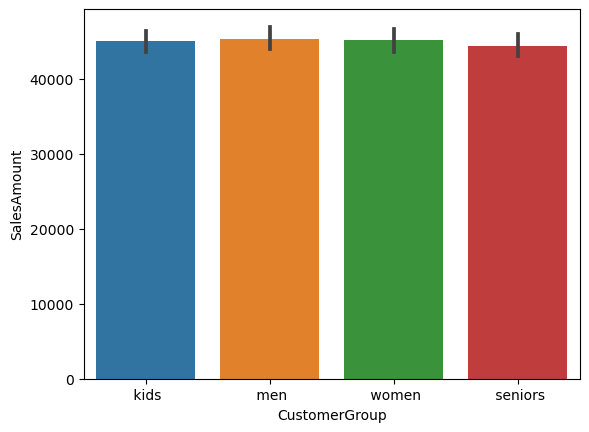

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1 
sns.barplot(data=df, x='CustomerGroup' ,  y = "SalesAmount")
plt.show()

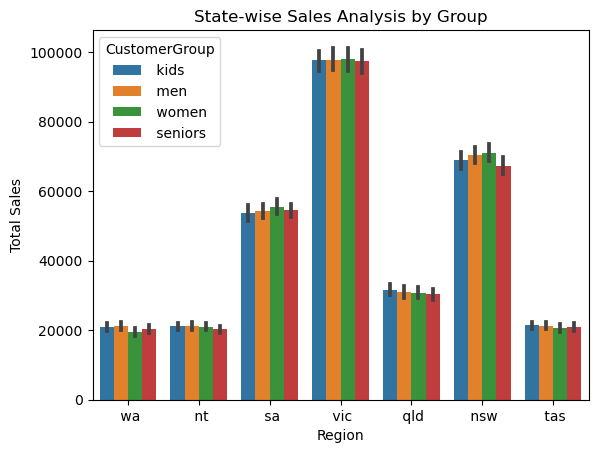

In [70]:

sns.barplot(data=df, x='Region' ,  y = "SalesAmount", hue="CustomerGroup")
plt.title("State-wise Sales Analysis by Group")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


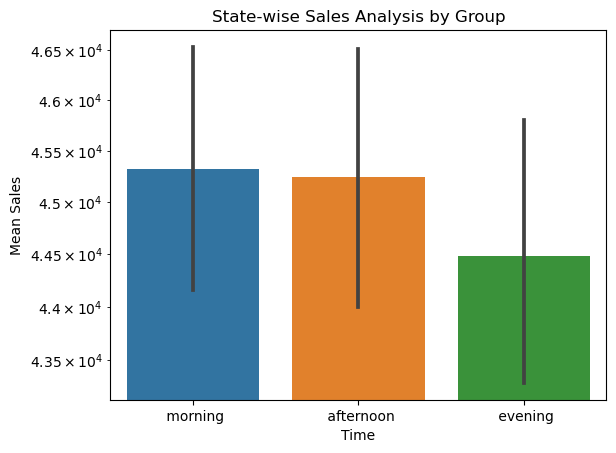

In [79]:
sns.barplot(data=df, x='OrderTime' ,  y = "SalesAmount")
plt.title("State-wise Sales Analysis by Group")
plt.xlabel("Time")
plt.ylabel("Mean Sales")
plt.yscale('log')
plt.show()


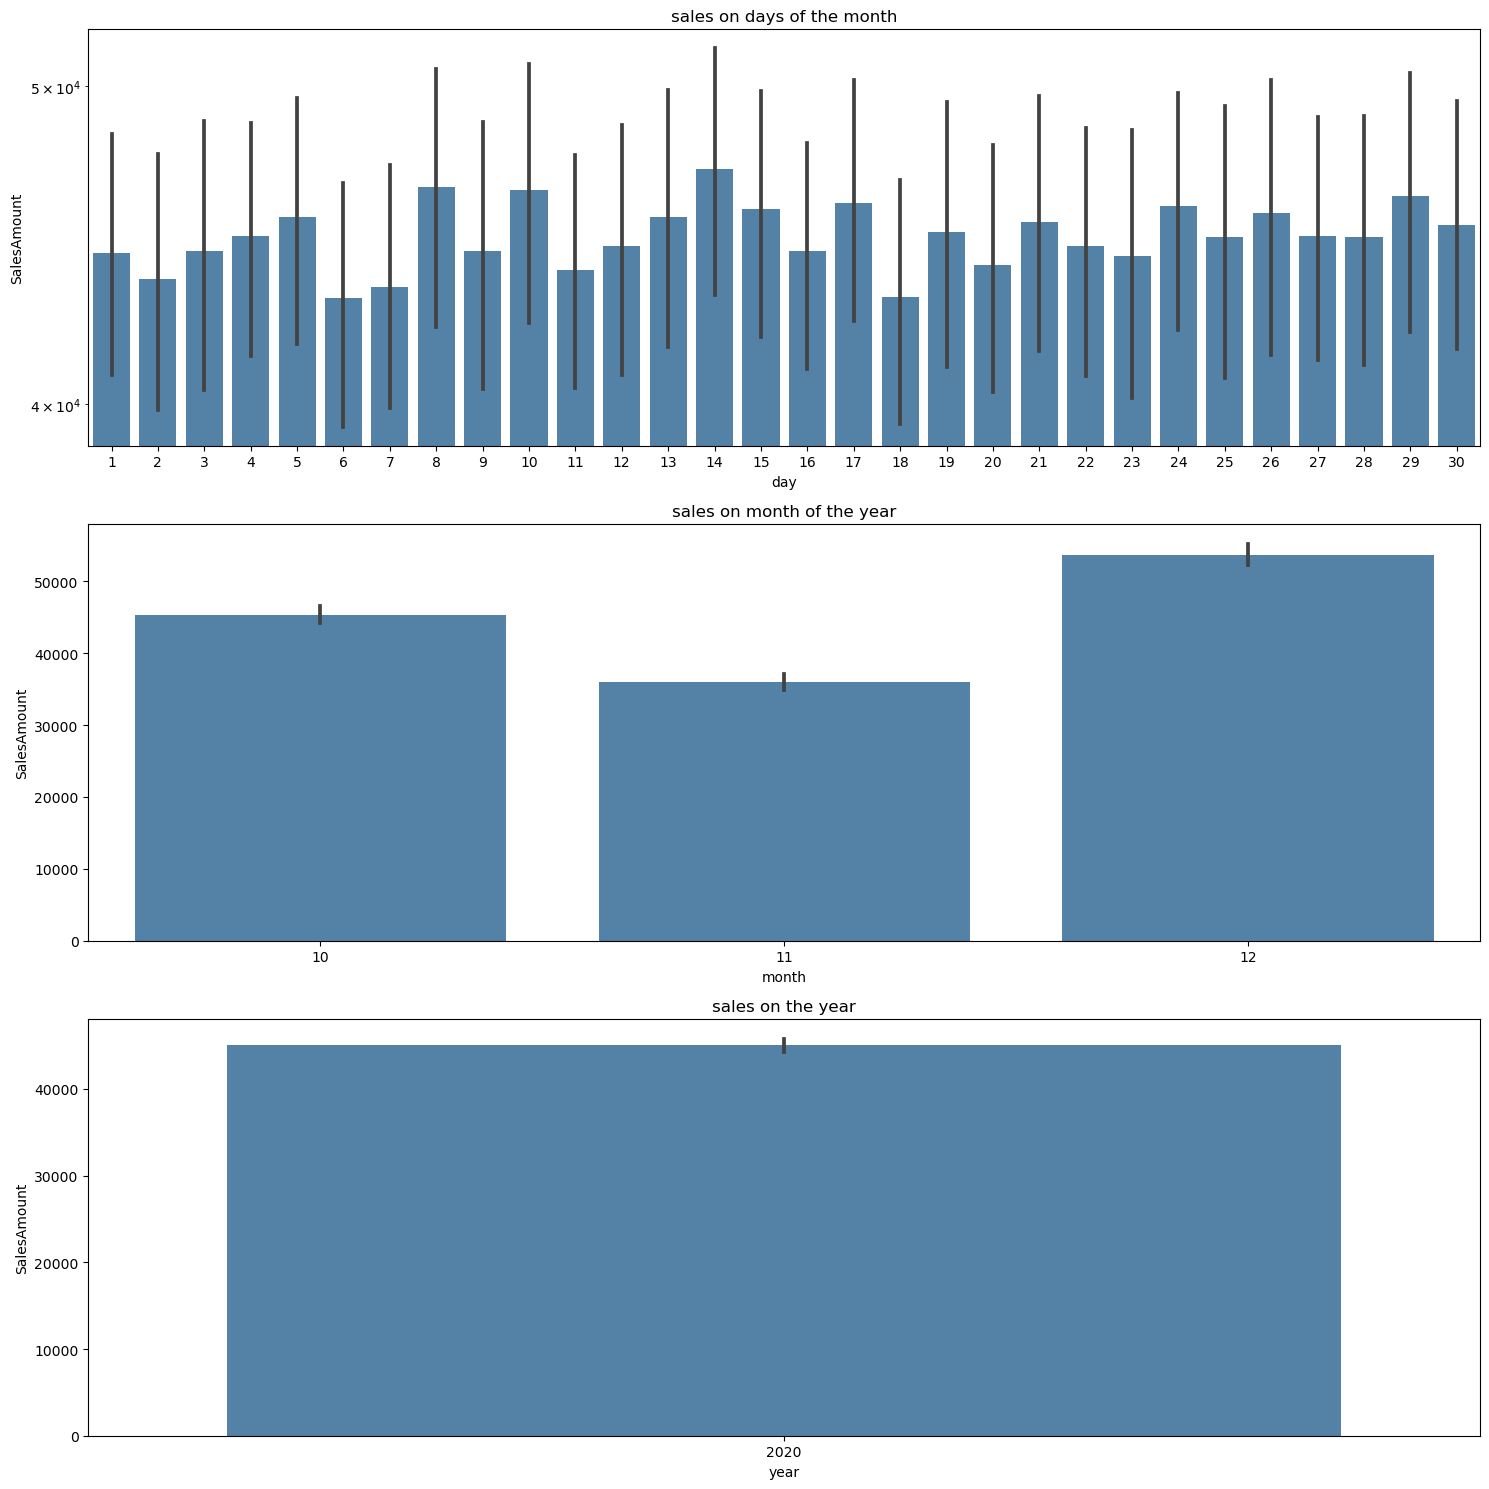

In [86]:

plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.title('sales on days of the month')
sns.barplot(data=df,x='day',y='SalesAmount',color='steelblue')
plt.yscale('log')

plt.subplot(3,1,2)
plt.title('sales on month of the year')
sns.barplot(data=df,x='month',y='SalesAmount',color='steelblue')

plt.subplot(3,1,3)
plt.title('sales on the year')
sns.barplot(data=df,x='year',y='SalesAmount',color='steelblue')
plt.tight_layout()
plt.show()